Instructions: Have all the code for all the questions in one Jupyter notebook and upload the file at the time of submission. I will only consider this file format for grading. So, after you uploaded the file, check the file extension and if it is not an ipynb, then upload the right file.

Question 1: (10 points)

Go to https://archive.ics.uci.edu/ml/datasets/Air+Quality 
and download the Excel file. Read the data description. 

Use Pandas to perform the following:

    1) read the Excel file and create a dataframe
    
    2) Find the number of columns and rows
    
    3) Print the first 5 rows of the dataframe
    
    4) Find the data type of the columns
    
    5) Find the missing values in each column and replace them with appropriate value of the column
    
    6) Find the correlation between features. 
 
    7) If possible, pick the features that are least correlated and perform multi-linear regression. Treat AH as the target variable.
       Find the mean squared error and r-squared for the test data and train data. Make a conclusion.

In [633]:
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [634]:
# 1. Read the excel file
# Note: I exported the excel file to csv and removed 2 empty columns
df = pd.read_csv('AirQualityUCI.csv', header=0, sep=',', engine='python')

# 2. Find the number of columns and rows
df.shape

(9357, 15)

<div class="alert alert-block alert-info">
<b>Result:</b> There are 15 columns and 9357 rows
</div>

In [636]:
# 3. Print the first 5 data rows of the data frame
df.head(6)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/04,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/04,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/04,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/04,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/04,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
5,3/10/04,23:00:00,1.2,1197,38,4.7,750,89,1337,96,1393,949,11.2,59.2,0.7848


In [637]:
# 4. Find the data type of the columns
df.dtypes

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)        int64
NMHC(GT)           int64
C6H6(GT)         float64
PT08.S2(NMHC)      int64
NOx(GT)            int64
PT08.S3(NOx)       int64
NO2(GT)            int64
PT08.S4(NO2)       int64
PT08.S5(O3)        int64
T                float64
RH               float64
AH               float64
dtype: object

In [638]:
# 5. Find the missing values in each column and replace them with appropriate value of the column
print(df.isnull().sum())

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


In [639]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


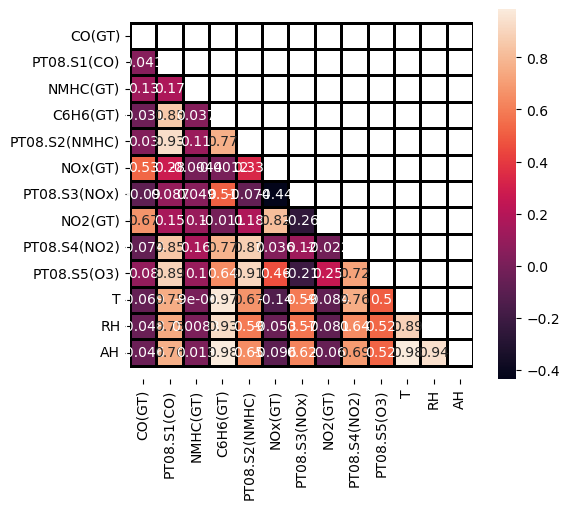

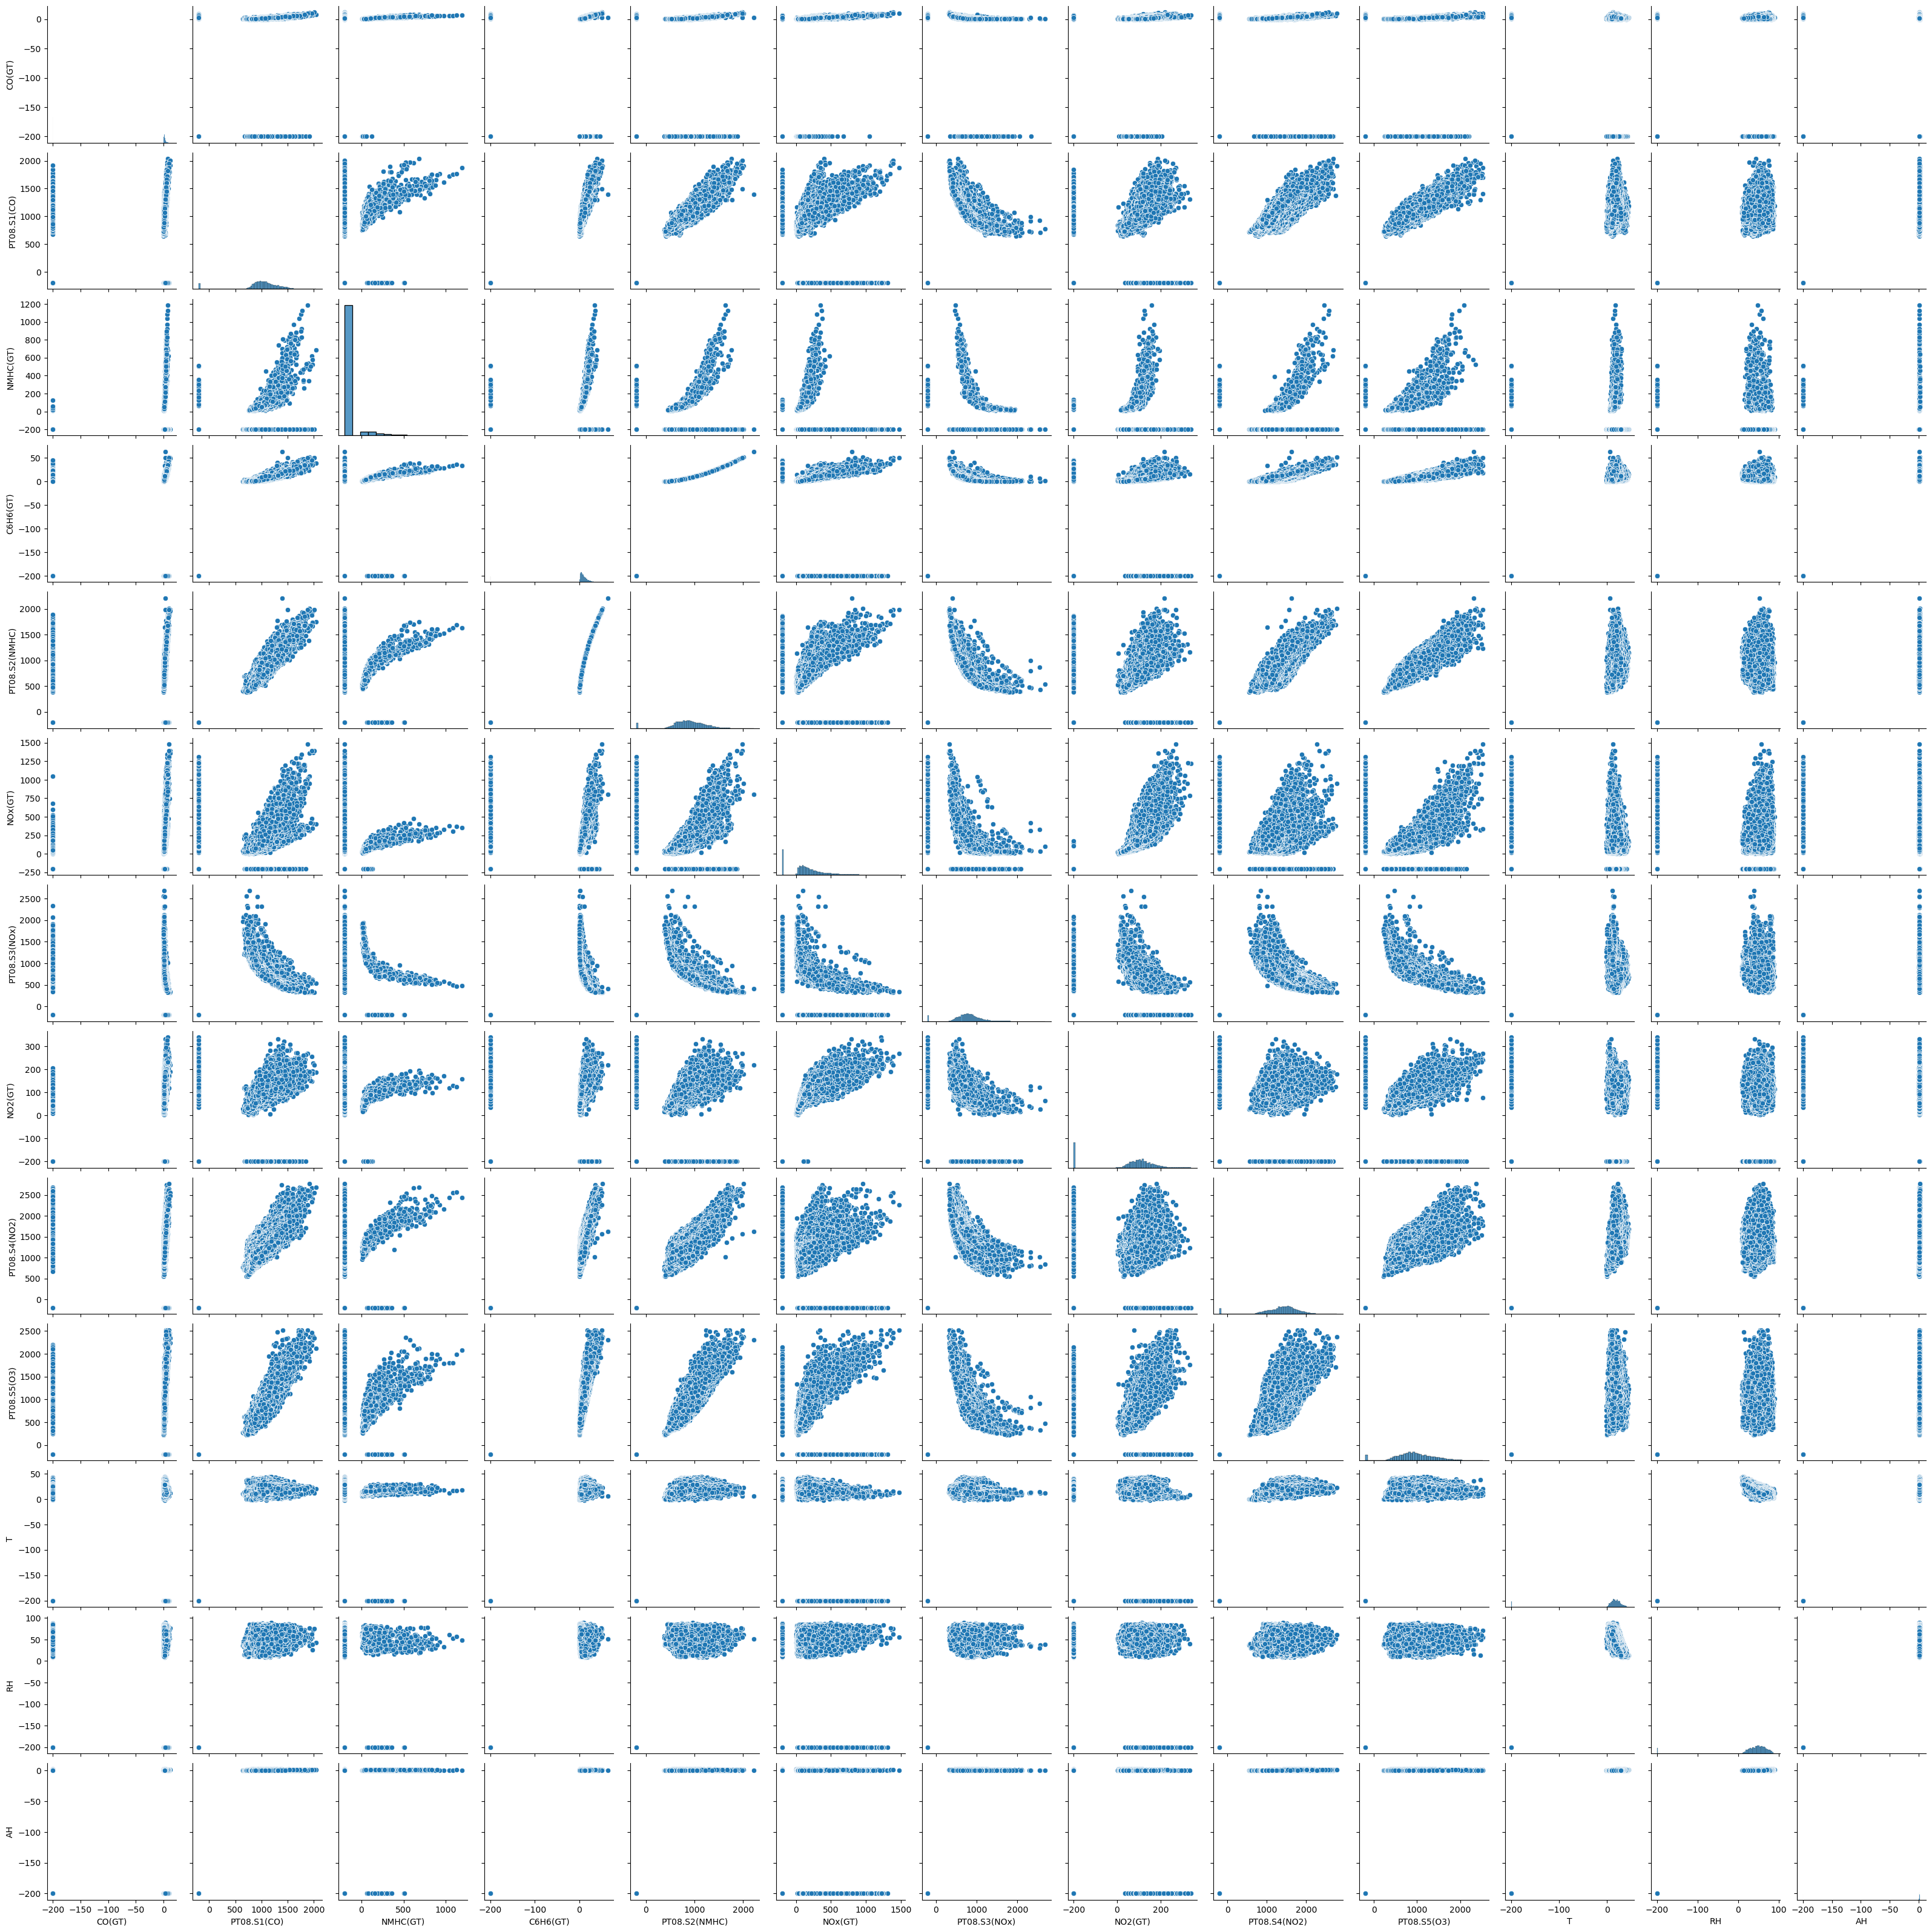

In [640]:
# 6. Find the correlation between features
import seaborn as sns
import matplotlib.pyplot as plt

# Categorical data is: Date, Time, PT08.S1(CO), PT08.S2(NMHC), PT08.S3(NOx), PT08.S4(NO2), PT08.S5(O3)
# We can use OneHotEncoder for the categorical data (except Date/Time) 
df.drop(['Date','Time'], axis=1, inplace=True)
# Basic correlogram
sns.pairplot(df)
plt.show()

In [641]:
# Display the correlation matrix as a heatmap
import numpy as np
matrix = np.triu(df.corr())

ax = sns.heatmap(df.corr(), annot = True, square=True, \
            linewidths=1, linecolor='black', mask=matrix)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

(13.5, -0.5)

In [642]:
# 7. If possible, pick the features that are least correlated and perform multi-linear regression. Treat AH as the target variable.
# Find the mean squared error and r-squared for the test data and train data. Make a conclusion.

# Choosing: CO(GT), T, NMHC(GT). I also chose NOx(GT) to get slightly better model performance even though it shows some correlation with CO(GT)

In [643]:
# Categorical data is: Date, Time, PT08.S1(CO), PT08.S2(NMHC), PT08.S3(NOx), PT08.S4(NO2), PT08.S5(O3)
# We can use OneHotEncoder for the categorical data (except Date/Time) but we're not choosing categorical data here for this exercise

In [644]:
from sklearn.preprocessing import StandardScaler
a_scaler = StandardScaler()
df_independent = a_scaler.fit_transform(df[['CO(GT)','T', 'NMHC(GT)', 'NOx(GT)']])
df_independent[0:5]

array([[ 0.4739999 ,  0.08846247,  2.21123554, -0.01016615],
       [ 0.46627322,  0.08151824,  1.93938293, -0.25490227],
       [ 0.46884878,  0.04911182,  1.76768654, -0.14613066],
       [ 0.46884878,  0.02827912,  1.71045441,  0.01314205],
       [ 0.4611221 ,  0.0329086 ,  1.50298794, -0.14613066]])

In [645]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
reg = linear_model.LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(df_independent, df['AH'], test_size=0.2, random_state=4)
reg.fit(x_train, y_train)

LinearRegression()

In [646]:
yhat = reg.predict(x_test) 
from sklearn.metrics import mean_squared_error
mse_test = mean_squared_error(y_test, yhat)
print('mean squared error for test data: ', mse_test)

mean squared error for test data:  54.52662107893825


In [647]:
# y_t_predict is the predicted y values for the x_train data
y_t_predict = reg.predict(x_train)

# note that y_train is the true y value
mse_train = mean_squared_error(y_train, y_t_predict)
print('mean squared error for train data: ', mse_train)

mean squared error for train data:  54.43277596824743


In [648]:
r1 = mse_test/mse_train

diff1 = np.abs((mse_train - mse_test)/mse_train)

print('r1: ', r1)

print('diff: ', diff1)

r1:  1.001724055204268
diff:  0.0017240552042681965


In [649]:
from sklearn.metrics import r2_score

print("r-squared for the test data: ", r2_score(y_test, yhat))
    
print("r-squared for the train data: ", r2_score(y_train, y_t_predict))

r-squared for the test data:  0.9653617312795825
r-squared for the train data:  0.9638367659988535


<div class="alert alert-block alert-info">
<b>Conclusion:</b> r-squared for test is 0.965 and for train is 0.964. The multi-linear model seems like a good fit. The diff of .1% between mse_train/test is less than 6% which is ideal.
</div>